In [ ]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

# path to folder
base_path = r"/Users/miguelcaramelo/Desktop/Data_Science/1_semestre/Machine_Learning/Project/Machine-Learning-project/project_data"
train_path = os.path.join(base_path, "train.csv")
df_train = pd.read_csv(train_path, delimiter=',', header=0, decimal='.', quotechar='"')
df_train["hasDamage"].unique()

array([ 0., nan])

In [6]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [7]:
df_train.tail()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
75972,15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [8]:
df_train.info()
#Passar a coluna id para o object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [9]:
df_train.set_index('carID', inplace = True)

In [10]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8
engineSize,74457.0,NaN,NaN,NaN,1.660136,0.573462,-0.103493,1.2,1.6,2.0,6.6


In [11]:
df_train.isna().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [ ]:
#non_metric_features=["Brand", "model", "year", "fuelType", "hasDamage", "transmission"]
#metric_features=df_train.columns.drop(non_metric_features).tolist()
v

array([ 0., nan])

In [ ]:
list_bmw = ["BMW", "MW", "bmw", "BM", "mw"]
list_audi = ["Audi", "udi", "AUDI", "audi", "Aud", "aud", "UDI", "ud", "AUD"]
list_mercedes = ["Mercedes", "mercedes", "Mercede", "MERCEDES", "ercedes", "mercede", "ERCEDES", "ercede", "MERCEDE"]
list_ford = ["Ford", "FOR", "For", "FORD", "ford", "for", "or", "ORD", "ord"]
list_toyota = ["Toyota", "Toyot", "TOYOTA", "oyota", "toyota", "OYOTA", "TOYOT", "toyot"]
list_opel = ["Opel", "Ope", "opel", "pel", "pe", "OPEL", "PEL", "OPE", "ope"]
list_skoda = ["Skoda", "koda", "skoda", "SKODA", "Skod", "kod", "SKOD", "KODA", "skod"]
list_hyundai = ["Hyundai", "yundai", "Hyunda", "hyundai", "HYUNDAI", "yunda", "HYUNDA", "YUNDA", "yunda", "hyunda"]
list_vw = ["VW", "V", "v","vw", "w", "W"]

def clean_brand(brand):
   if brand in list_bmw:
      return "BMW"
   elif brand in list_audi:
      return "Audi"
   elif brand in list_mercedes:
      return "Mercedes"
   elif brand in list_ford:
      return "Ford"
   elif brand in list_toyota:
      return "Toyota"
   elif brand in list_opel:
      return "Opel"
   elif brand in list_skoda:
      return "Skoda"
   elif brand in list_hyundai:
      return "Hyundai"
   elif brand in list_vw:
      return "VW"
   else:
      return brand
   
df_train['Brand'] = df_train['Brand'].apply(clean_brand)
df_train['transmission'].unique()

#df_train[df_train["Brand"].isna()]
#for i in non_metric_features:
   #print(df_train[i].unique())
#hasDamage é a variável constante, em principio não faz sentido mantê-la

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'utomatic', 'unknow', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       ' MANUAL ', 'UNKNOWN', 'nknown', 'automati', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

In [26]:
X = df_train.drop('price', axis = 1)
y = df_train['price']
y

carID
69512    22290
53000    13790
6366     24990
29021    12500
10062    22995
         ...  
37194    13498
6265     12495
54886     8399
860      12990
15795    10495
Name: price, Length: 75973, dtype: int64

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)

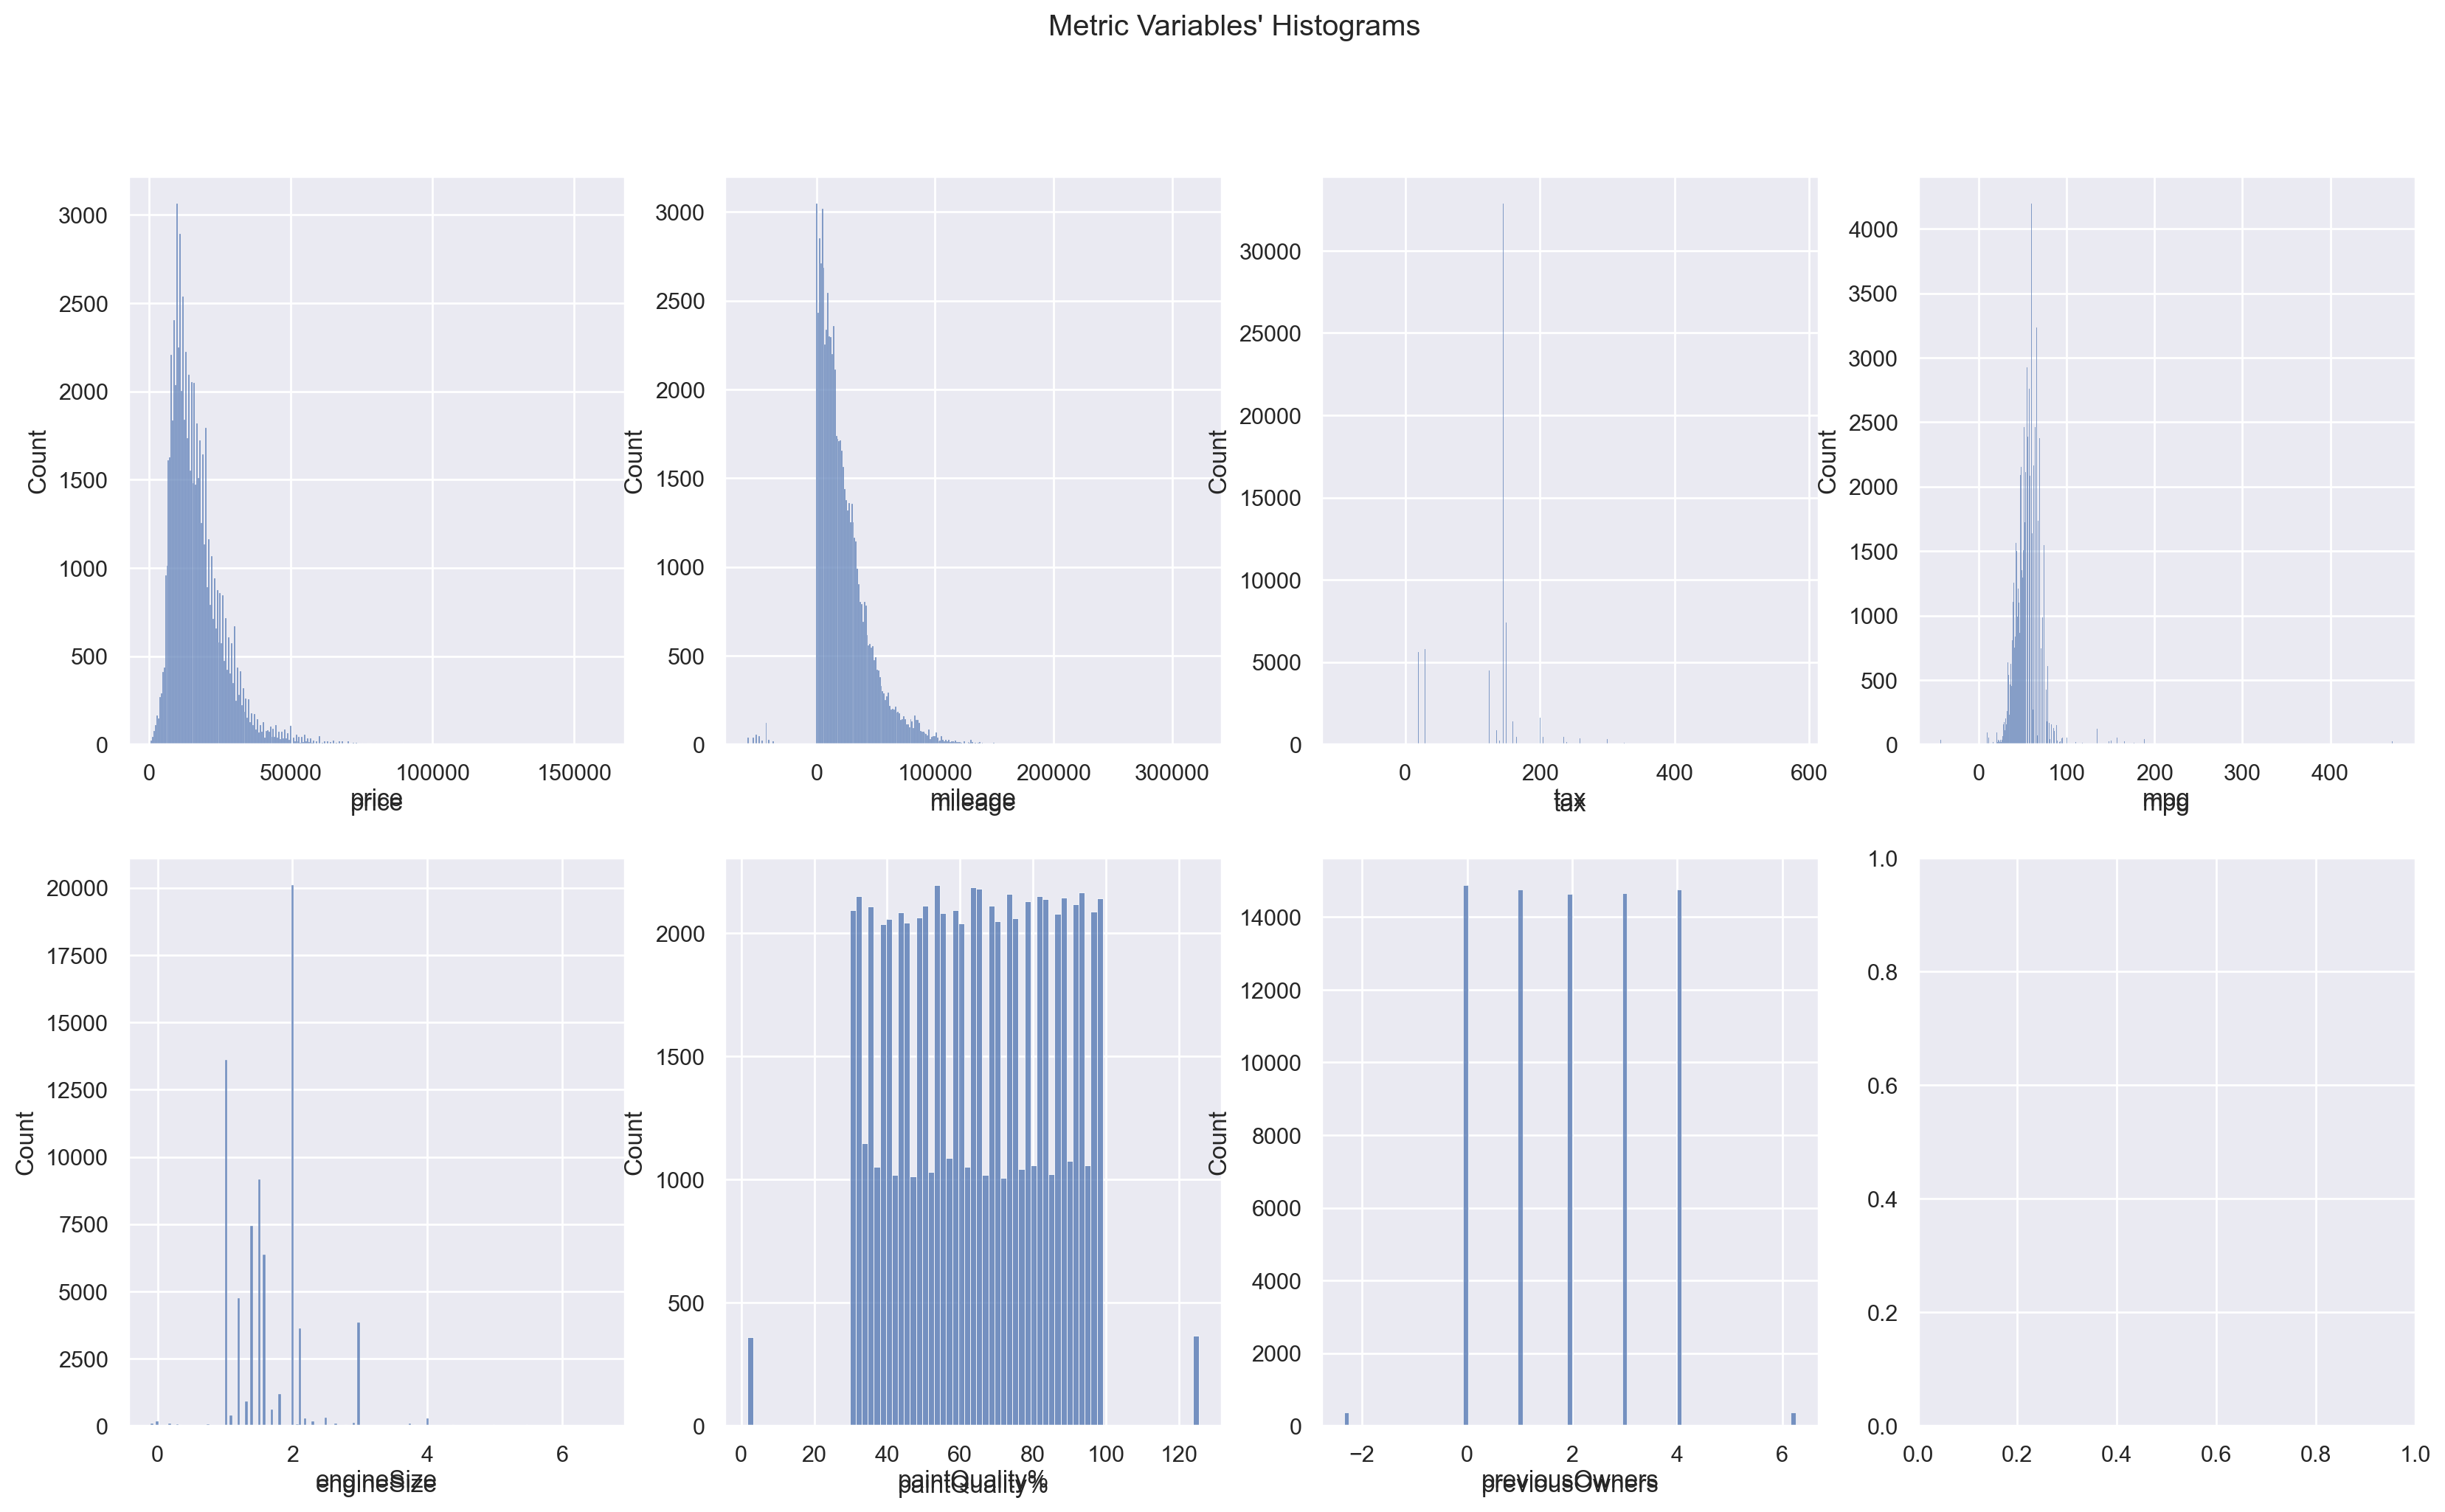

'\nfor i in metric_features:\n    plt.figure(figsize=(10,5))\n    sns.histplot(data=df_train, x=i)\n    plt.show()\n'

In [54]:
non_metric_features=["Brand", "model", "year", "fuelType", "hasDamage", "transmission"]
metric_features=df_train.columns.drop(non_metric_features).tolist()
#print(metric_features)

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = 4


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(df_train[feat], ax=ax)
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"

plt.suptitle(title)

#if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    #os.makedirs(os.path.join('..', 'figures', 'eda'))
    
#plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()
"""
for i in metric_features:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df_train, x=i)
    plt.show()
"""